# The function optimization.

Our fuction is: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) on range [1, 15].

We will approximate this function by polynomials.

In [14]:
import numpy as np
from matplotlib import pylab as plb
from scipy import interpolate, linalg

In [5]:
%matplotlib inline

In [69]:
def func(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp(-x/2.)

In [70]:
one_dim_m = np.array([[1.,1.],[1.,15.]])
one_dim_y = np.array([func(1.), func(15.)])

one_dim_x = linalg.solve(one_dim_m, one_dim_y)

print(f"Test1: {(one_dim_y - np.dot(one_dim_m, one_dim_x)) < 0.001}")

def one_dim_func(x):
    return one_dim_x[0] + one_dim_x[1] * x

Test1: [ True  True]


In [72]:
two_dim_m = np.array([[1.,1.,1.],[1.,8.,8.**2],[1.,15.,15.**2]])
two_dim_y = np.array([func(1.), func(8.), func(15.)])

two_dim_x = linalg.solve(two_dim_m, two_dim_y)

print(f"Test2: {(two_dim_y - np.dot(two_dim_m, two_dim_x)) < 0.001}")

def two_dim_func(x):
    return two_dim_x[0] + two_dim_x[1] * x + two_dim_x[2] * x ** 2

Test2: [ True  True  True]


In [66]:
three_dim_m = np.array([[1.,1.,1.,1.],[1.,4.,4.**2,4.**3],[1.,10.,10.**2,10.**3],[1.,15.,15.**2,15.**3]])
three_dim_y = np.array([func(1.), func(4.), func(10.), func(15.)])

three_dim_x = linalg.solve(three_dim_m, three_dim_y)

print(f"Test3: {(three_dim_y - np.dot(three_dim_m, three_dim_x)) < 0.001}")

def three_dim_func(x):
    return three_dim_x[0] + three_dim_x[1] * x + three_dim_x[2] * x ** 2 + three_dim_x[3] * x ** 3

Test3: [ True  True  True  True]


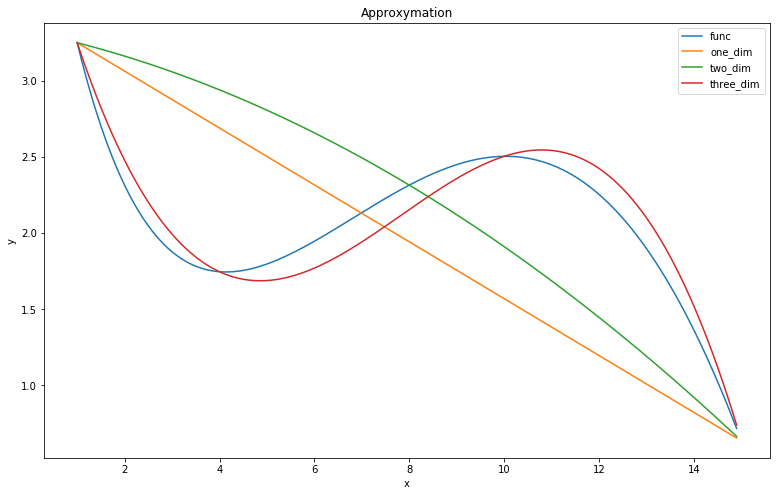

In [74]:
x = np.arange(1,15,0.1)
y = func(x)

plb.figure(figsize=(13,8))
plb.plot(x, y, label="func")
plb.plot(x, one_dim_func(x), label="one_dim")
plb.plot(x, two_dim_func(x), label="two_dim")
plb.plot(x, three_dim_func(x), label="three_dim")
plb.xlabel("x")
plb.ylabel("y")
plb.legend()
plb.title("Approxymation")
plb.show()

In [77]:
print(f"Our ratio: {np.around(three_dim_x, decimals = 2)}")

Our ratio: [ 4.36 -1.3   0.19 -0.01]


Result: Approximation by polynomial of the third power is most appropriate.